In [69]:
# use seaborn for pairplot
!pip install -q seaborn
#dataset

#https://www.kaggle.com/datasets/uciml/autompg-dataset

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make numpy printouts easier to read
np.set_printoptions(precision=3, suppress=True)

In [71]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [72]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv('auto-mpg.csv')



In [73]:
dataset = raw_dataset.copy()
dataset.sample()

dataset[dataset['car name']=='ford galaxie 500']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
40,14.0,8,351.0,153,4154,13.5,71,1,ford galaxie 500
65,14.0,8,351.0,153,4129,13.0,72,1,ford galaxie 500


In [74]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [75]:
dataset = dataset.dropna()

In [76]:
dataset['origin'] = dataset['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [77]:
dataset = pd.get_dummies(dataset, columns=['origin'], prefix='', prefix_sep='')

In [85]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset['horsepower']=train_dataset['horsepower'].astype(float)

ValueError: ignored

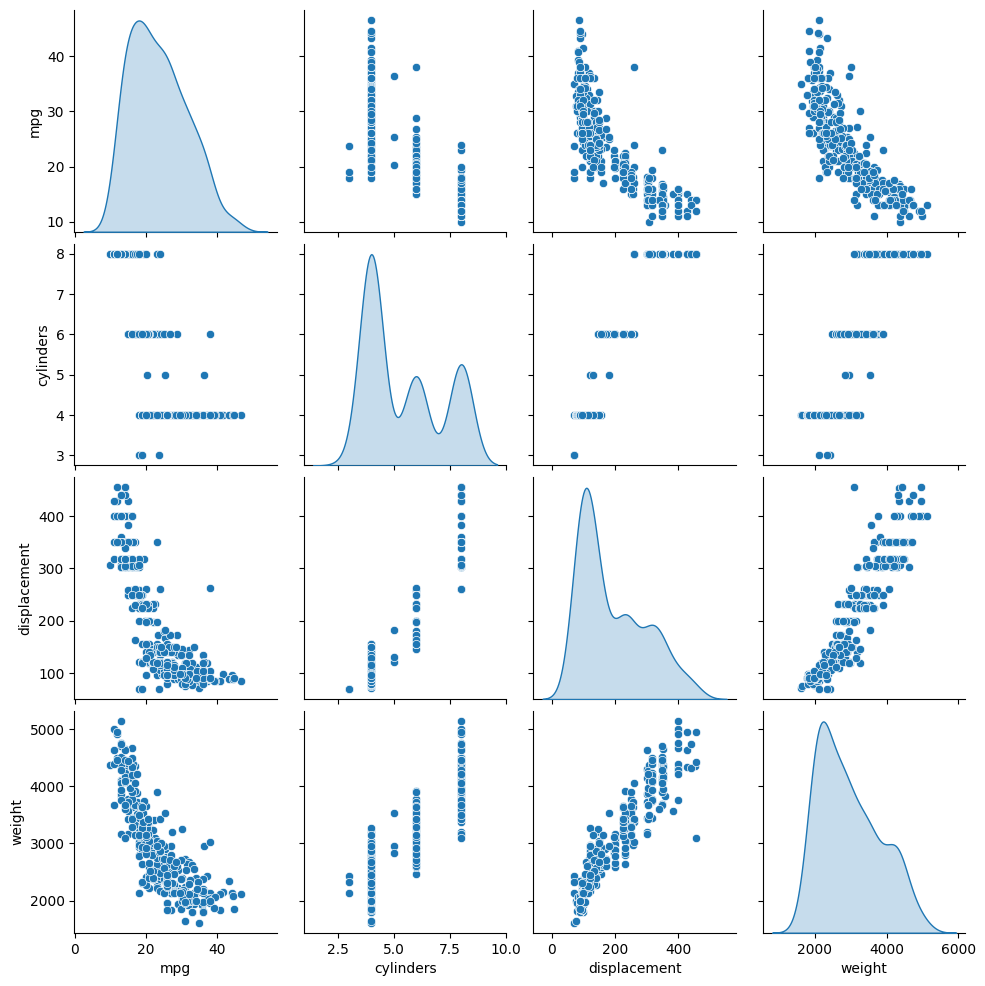

In [86]:
sns.pairplot(train_dataset[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind='kde')

In [87]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,318.0,23.590566,7.913617,10.0,17.125,22.75,29.00,46.6
cylinders,318.0,5.427673,1.682941,3.0,4.000,4.00,6.00,8.0
displacement,318.0,193.061321,103.812742,70.0,100.250,151.00,259.50,455.0
weight,318.0,2963.823899,844.749805,1613.0,2219.250,2792.50,3571.25,5140.0
acceleration,318.0,15.595912,2.796282,8.0,13.900,15.50,17.30,24.8
model year,318.0,75.946541,3.705266,70.0,73.000,76.00,79.00,82.0
Europe,318.0,0.163522,0.370424,0.0,0.000,0.00,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.000,0.00,0.00,1.0
USA,318.0,0.641509,0.480313,0.0,0.000,1.00,1.00,1.0


In [88]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

In [89]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
mpg,23.590566,7.913617
cylinders,5.427673,1.682941
displacement,193.061321,103.812742
weight,2963.823899,844.749805
acceleration,15.595912,2.796282
model year,75.946541,3.705266
Europe,0.163522,0.370424
Japan,0.194969,0.396801
USA,0.641509,0.480313


In [90]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [91]:
normalizer.adapt(np.array(train_features).astype(np.float32))

ValueError: ignored

In [ ]:
np.array(train_features)

In [ ]:
print(normalizer.mean.numpy())

In [ ]:
first = np.array(=train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

In [ ]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([horsepower_normalizer,layers.Dense(units=1)])

horsepower_model.summary()

In [ ]:
horsepower_model.predict(horsepower[:10])

In [ ]:
horsepower_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    #suppress logging.
    verbose=0,
    #calculate validation results on 20% of the ttraing data
    validation_split = 0.2)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [ ]:
def plot_horsepower(x,y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [ ]:
plot_horsepower(x, y)

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

In [ ]:
linear_model.layers[1].kernel

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    #supress logging
    verbose=0,
    #calculate validation results on 20% of the training data
    validation_split = 0.2)

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu')
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [ ]:
dnn_horsepower_model.summary()

In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split = 0.2,
    verbose = 0, epochs=100)

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

In [ ]:
plot_horsepower(x, y)

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evalute(
    test_features['Horsepower'], test_label,
    verbose=0)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
%%time
history = dnn_model.fits(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evalute(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

In [ ]:
test_predictions = dnn_model.predict(test_features).flatter

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0.50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt,xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evalute(
    test_features, test_labels,verbose=0)

In [ ]:
pd.DataFrame(test_result, index=['Mean absolute error [MPG]']).T